<a href="https://colab.research.google.com/github/mechihallberg/2024UCALCD001/blob/main/SocialMediaConsumerBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pdç
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
datos = pd.read_csv('datos.csv')

In [11]:
datos.head(15)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [12]:
datos.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

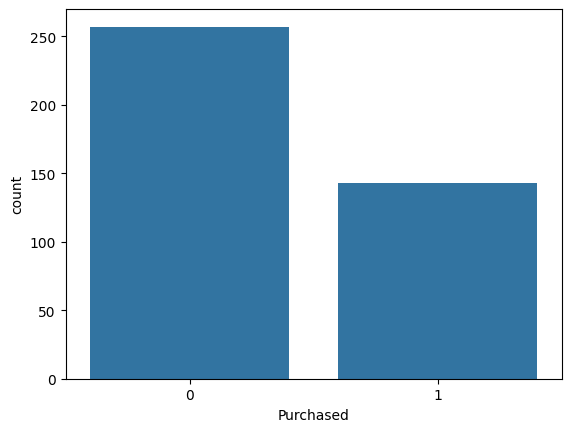

In [14]:
sb.countplot(x='Purchased', data=datos)

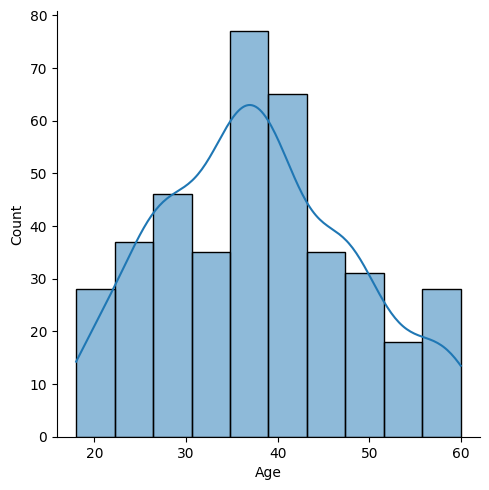

In [18]:
sb.displot(x='Age', data=datos, kde=True)

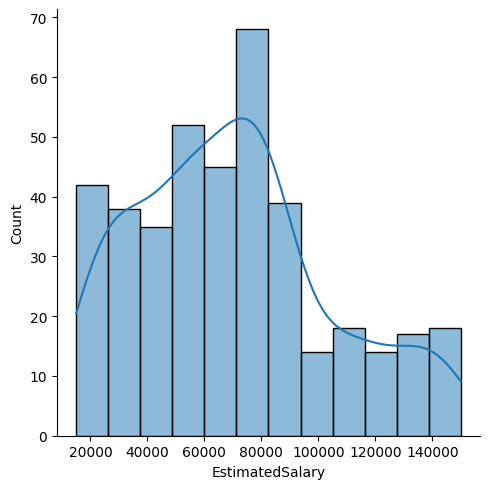

In [19]:
sb.displot(x='EstimatedSalary', data=datos, kde=True)

In [17]:
datos.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64